# Ejercicio: Perfiles de Twitter

A continuación, vamos a realizar un ejercicio donde vamos a intentar extraer la forma de expresarse de diferentes celebridades en Twitter para ver si es algo común a la profesión que desempeñan. Para ello, haremos una agrupación en base al número de palabras que utilizan, su empatía y su extraversión.

### Importa los datos y las librerías necesarias

Los datos están en el csv "twitter.csv"

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv("twitter.csv")
df

,usuario,n_palabras,empatia,extraversion,profesion
0,3gerardpique,37.0945,29.370315,41.948819,7
1,aguerosergiokun,78.7970,24.279098,37.938947,7
2,albertochicote,49.2604,34.645521,38.999896,4
3,AlejandroSanz,80.4538,31.082154,52.337538,2
4,alfredocasero1,47.0645,31.138871,48.530806,4
...,...,...,...,...,...
135,XabiAlonso,47.5420,31.624351,38.904885,7
136,XaviRodriguez,47.5625,40.096458,48.533125,4
137,xoellopez,74.3065,19.093548,27.571210,2
138,ZacEfron,118.6107,23.008168,36.465344,1


### Análisis descriptivo

Estos datos hacen referencia a:
 * **usuario**: cuenta de Twitter de la celebridad
 * **n_palabras**: media de palabras que utiliza la cuenta en sus mensajes
 * **empatia**: grado de empatía del usuario
 * **extraversion**: grado de extraversión del usuario
 * **profesion**: profesión que desempeña el usuario. Sus valores son:
   * 1: Actor/actriz
   * 2: Cantante
   * 3: Modelo
   * 4: TV
   * 5: Radio
   * 6: Tecnología
   * 7: Deportes
   * 8: Político
   * 9: Escritor
 
Como hemos comentado al principio, vamos a utilizar las columnas ``n_palabras``, ``empatia`` y ``profesion``:
1. Dibuja el histograma de cada una de ellas
2. Realiza una representación de cada pareja de las variables, donde el color represente la profesión del usuario

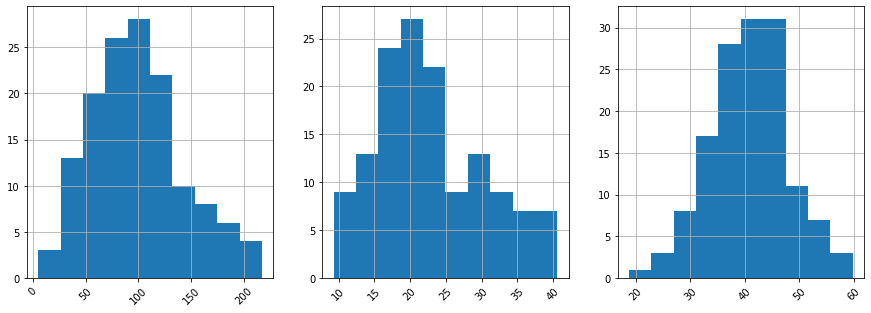

In [2]:
figure = plt.figure(figsize=(15,5))
columnas = ['n_palabras', 'empatia', 'extraversion']

for i, col in enumerate(columnas):
    ax = figure.add_subplot(1, len(columnas), i+1)
    df[col].hist(ax=ax)
    plt.xticks(rotation=45)

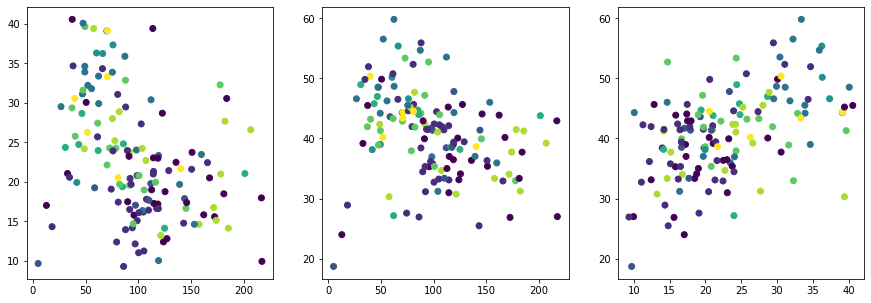

In [3]:
figure = plt.figure(figsize=(15,5))

ax1 = figure.add_subplot(1, 3, 1)
plt.scatter(df[columnas[0]], df[columnas[1]], c=df['profesion'])

ax2 = figure.add_subplot(1, 3, 2)
plt.scatter(df[columnas[0]], df[columnas[2]], c=df['profesion'])

ax3 = figure.add_subplot(1, 3, 3)
plt.scatter(df[columnas[1]], df[columnas[2]], c=df['profesion'])

#### Calcula el k óptimo

Para ello, utiliza el silhouette_score para evaluar. Evalúa, como mucho, hasta k = 20.

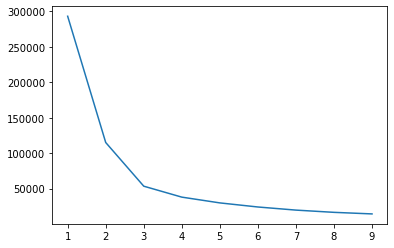

In [4]:
# Inertia + elbow:
from sklearn.cluster import KMeans

X = df[columnas]

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias)

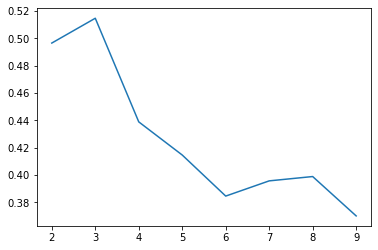

In [5]:
# Silhouette score:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.plot(range(2, 10), silhouette_scores)

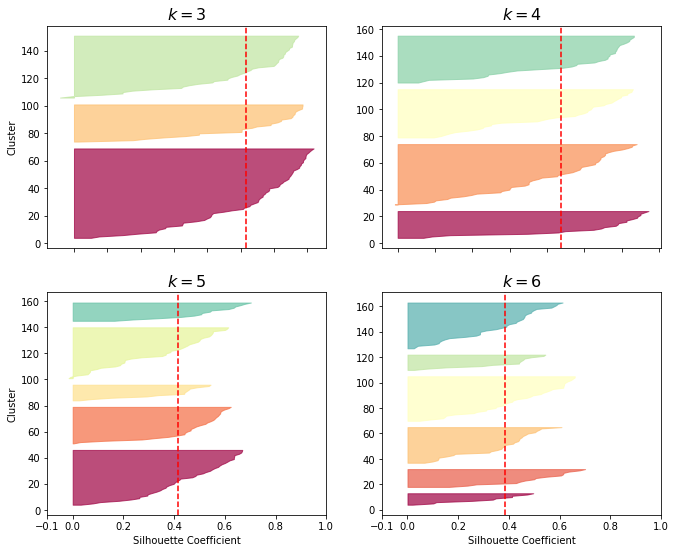

In [6]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
import numpy as np
# from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k-2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

#### Crea el modelo KMeans

En base al k que acabas de obtener, crea el modelo no supervisado con el algoritmo KMeans. Además, créate un DataFrame con X y añade las predicciones en una nueva columna 'preds'.

In [7]:
from matplotlib.colors import ListedColormap

n_clusters = 4
kmodel = KMeans(n_clusters = n_clusters)
kmodel.fit(X)

# Creamos df para separar a la hora de pintar:
df_plot = X
df_plot['pred'] = kmodel.labels_

<ipython-input-7-c7cbc453e645>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['pred'] = kmodel.labels_


#### Representa la agrupación que has realizado

Puedes hacerlo representando las variables de dos en dos, donde el color represente la agrupación o puedes hacerlo en 1 gráfico 3d.

*Nota*:

Para el gráfico 3D puedes:

1. Crear una lista con colores:
```Python
colores = ['red', 'blue', 'green', 'black', 'yellow']
```


2. Crear un axis 3D:
```Python
ax = plt.axes(projection='3d')
```


3. Hacer un for para representar cada uno de los grupos de clustering, asignando colores diferentes en cada iteración, y donde cada sentencia utilice el método:
```Python
ax.scatter()
```



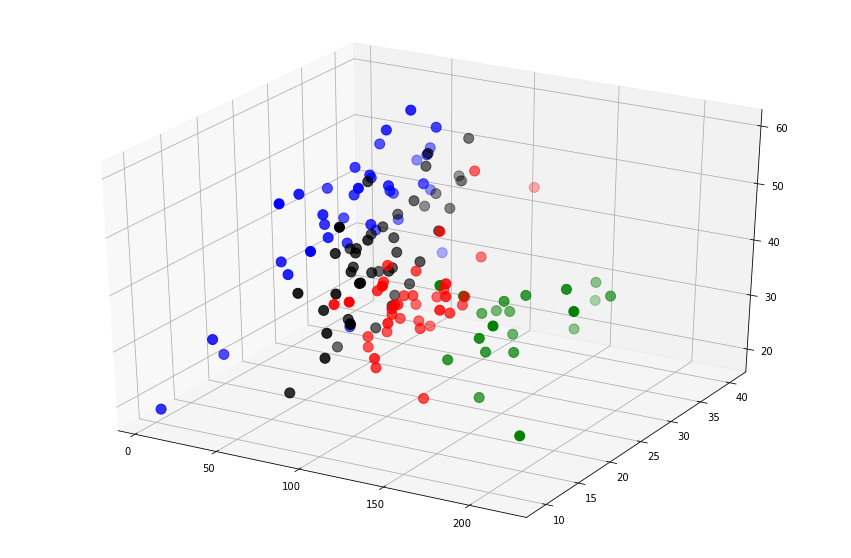

In [8]:
plt.figure(figsize=(15, 10))

colores = ['red', 'blue', 'green', 'black', 'yellow']

ax = plt.axes(projection='3d')

for k in range(1, n_clusters+1):
    df_subplot = df_plot[df_plot['pred']==k-1]
    ax.scatter(df_subplot[columnas[0]], df_subplot[columnas[1]], df_subplot[columnas[2]], c=colores[k-1], marker='.', s=400)

#### Analiza los resultados

Realiza un gráfico de tarta por cada grupo que has creado para ver cuántos usuarios de cada profesión original se han identificado en cada uno de estos grupos.

¿Podemos mantener la teoría que habíamos planteado inicialmente en la que creíamos que los compañeros de profesión se comportarían de forma semejante en la red social?

ValueError: num must be 1 <= num <= 4, not 5

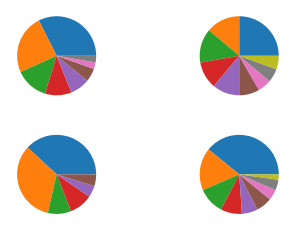

In [9]:
df_plot['profesion'] = df['profesion']

for k in range(0, n_clusters+1):
    plt.subplot(2, 2, k+1)
    plt.pie(df_plot[df_plot['pred']==k]['profesion'].value_counts())